In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (26, 8)

In [124]:
model_recs = pd.read_csv('results/metrics/rec_result.csv', sep=';')
random_recs = pd.read_csv('results/metrics/ran_result.csv', sep=';')

df_means = pd.read_csv('results/metrics/mean.csv', sep=';')
df_medians = pd.read_csv('results/metrics/median.csv', sep=';')

all_recs = model_recs.copy(deep=True)
all_recs['source'] = 'model'
temp = random_recs.copy(deep=True)
temp['source'] = 'random'
all_recs = pd.concat([all_recs, temp]).reset_index(drop=True)

Рассматриваем рекомендацию похожих статей на выбранную статью.<br/>
Сравниванием рекомендации полученные с помошью модели, и рекомендации полученные с путем случайного выбора из всего доступного набора статей. Рассмативаются топ-n рекомендаций, где n: 1, 2, 3, 4, 5, 10, 20, 30, 40, 50. <br/>
Качество предлагается измерять с помощью коэффициента Жаккара, "похожесть" статьи и рекомендаций для нее измеряется на основе "похожести" тэгов статей.

### Коэффициент Жаккара: 
$$
Jaccard(X, Recs(X)) = \frac{|X \wedge Recs(X)|}{|X \lor Recs(X)|} = \frac{\sum_{T \in Recs(X)} |tags(X) \wedge tags(T)|}{\sum_{T \in Recs(X)} |tags(X) \lor tags(T)|}
$$

### Среднее и медиана

#### Среднее

In [125]:
df_means

,source,1,2,3,4,5,10,20,30,40,50
0,model,0.379454,0.324997,0.303788,0.292725,0.286234,0.269852,0.258602,0.253626,0.250374,0.248103
1,random,0.253631,0.220039,0.206988,0.201076,0.197357,0.190213,0.186651,0.185592,0.185041,0.184578


#### Медиана

In [126]:
df_medians

,source,1,2,3,4,5,10,20,30,40,50
0,model,0.111111,0.290323,0.200000,0.269841,0.234568,0.250000,0.257862,0.263158,0.265823,0.265823
1,random,0.000000,0.000000,0.090909,0.111111,0.111111,0.169591,0.219512,0.239669,0.250000,0.259446


Видим что модельные рекомендации имеют более высокие значения среднего и медианы для всех рассматриваемых топ-n по сравнению со случайными рекомендациями.

### Распределения

Для примера рассмотрим распределение значений коэффициента Жаккара для топ-10 рекомендованных статей

Модель:

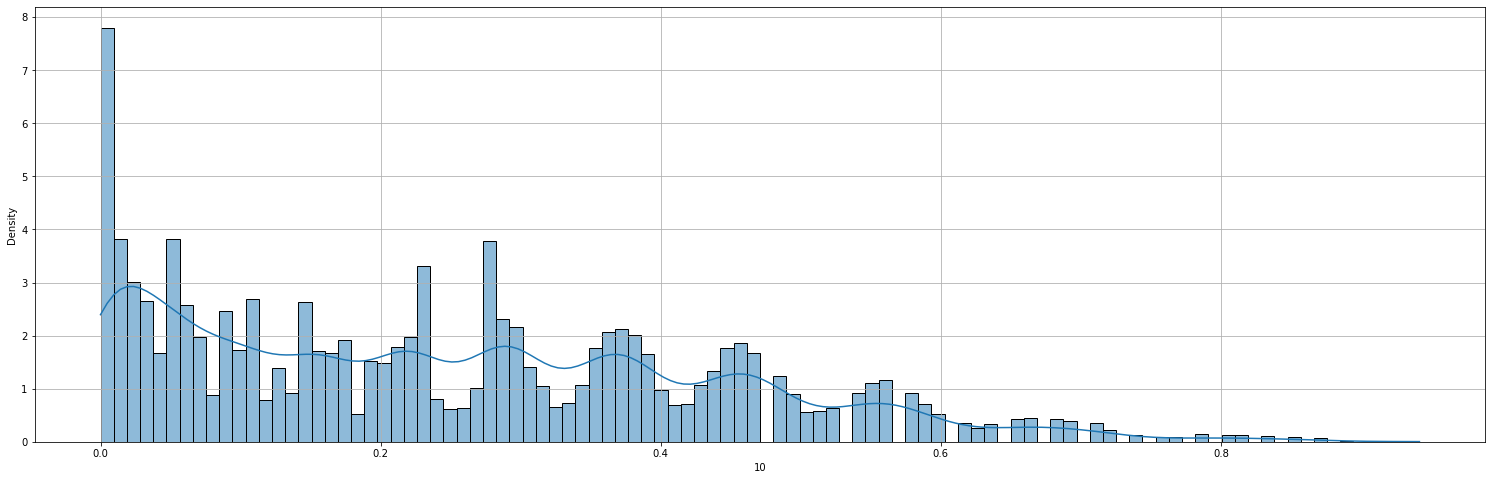

In [134]:
sns.histplot(model_recs['10'], kde=True, common_bins=True, stat='density', bins=100)
plt.grid()

Случайные статьи:

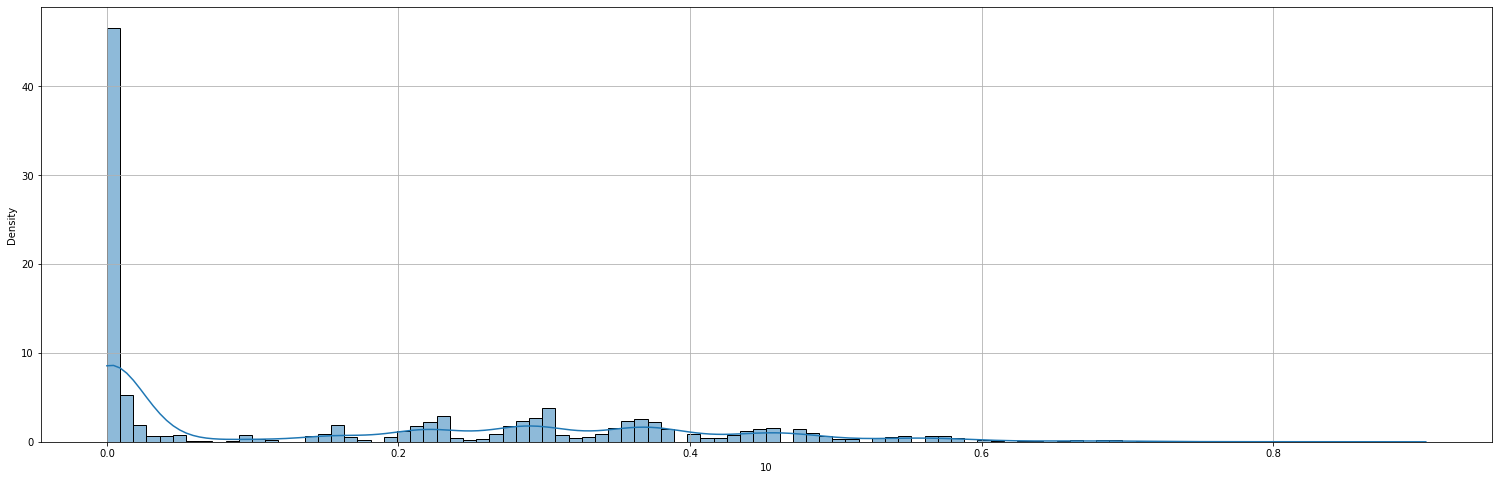

In [135]:
sns.histplot(random_recs['10'], kde=True, common_bins=True, stat='density', bins=100)
plt.grid()

Видно, что в случае случайных статей, очень много 0 значений коэффициента в отличие от модельного предсказания, что в целом ожидаемо.

Посмотрим на распределения с "отрезанным" хвостом малых значений для всех рассматриваемых топ-n 

In [129]:
min_border = 0.02

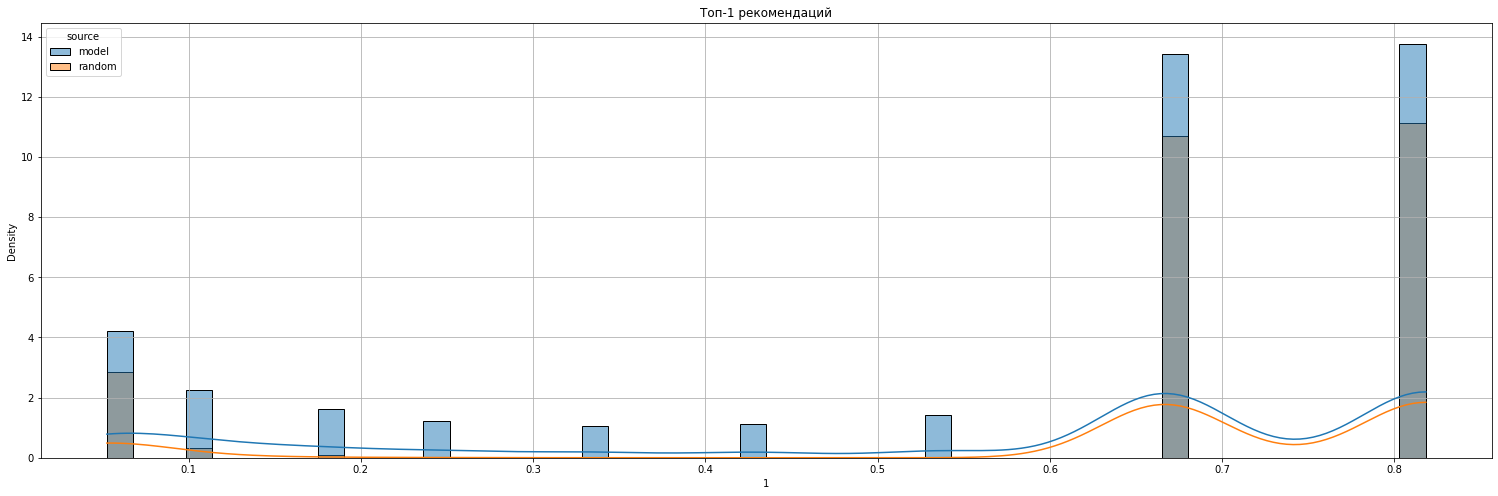

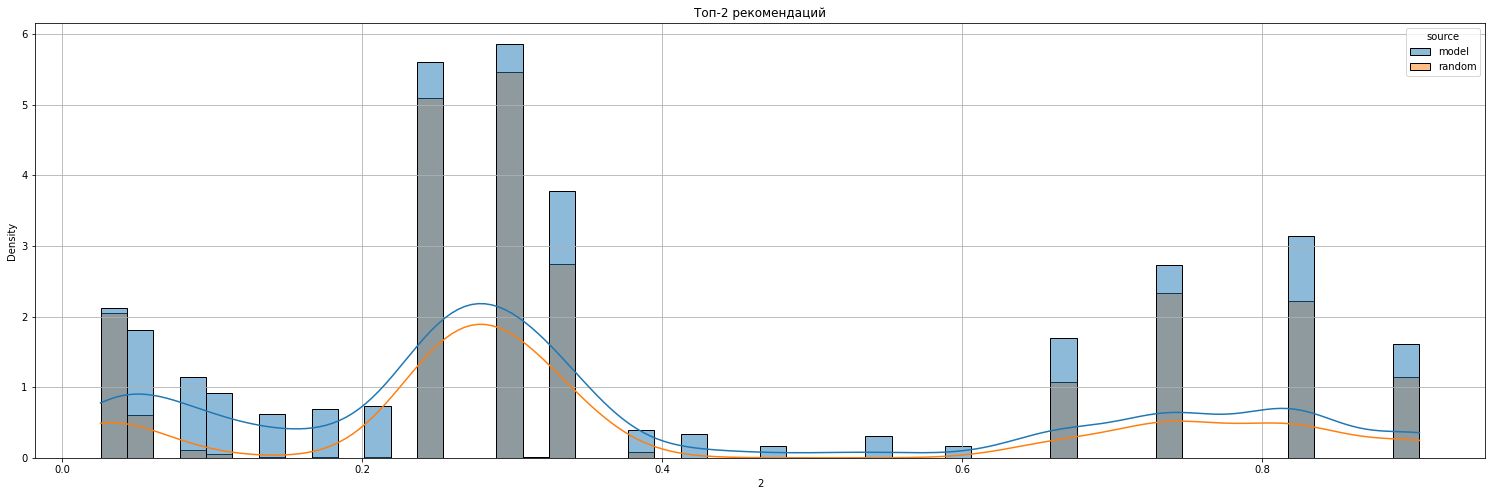

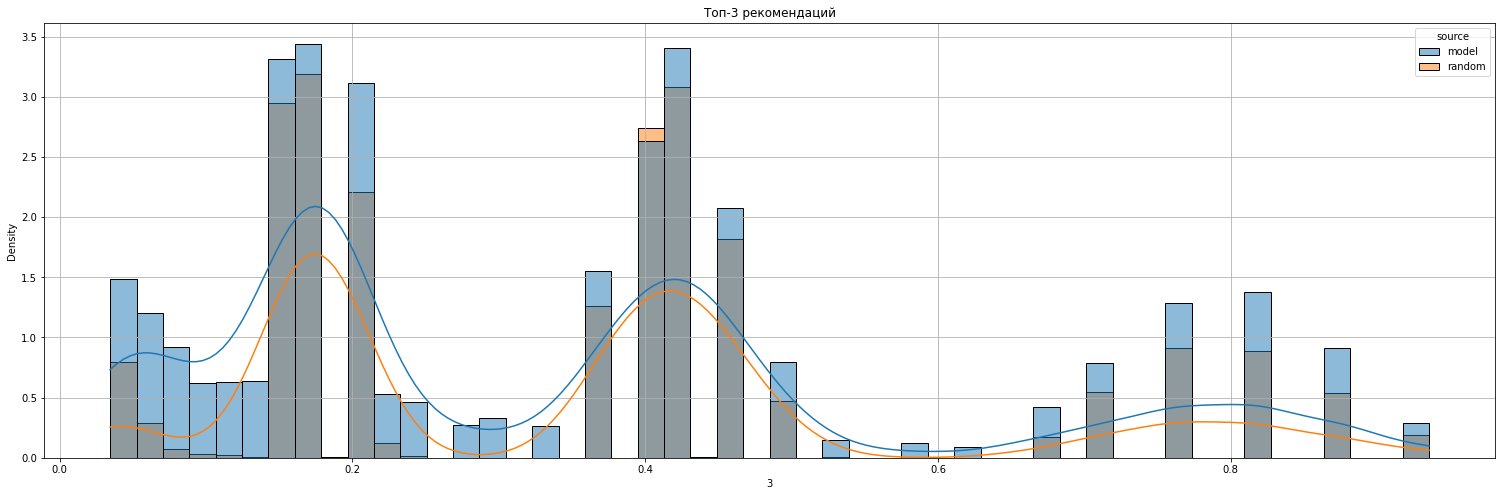

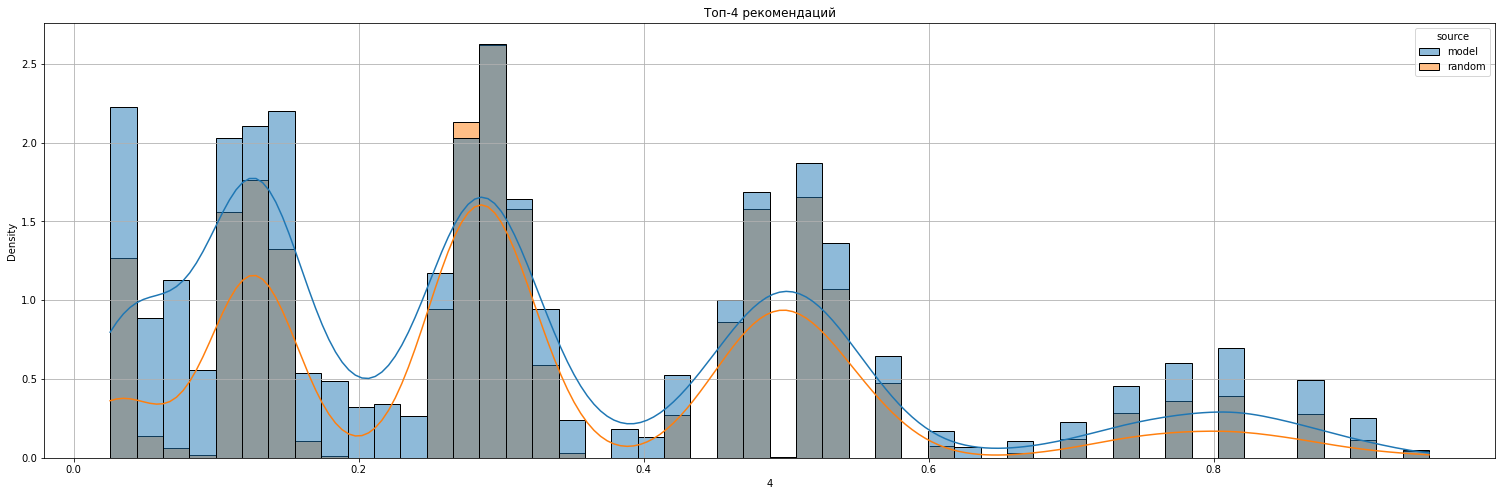

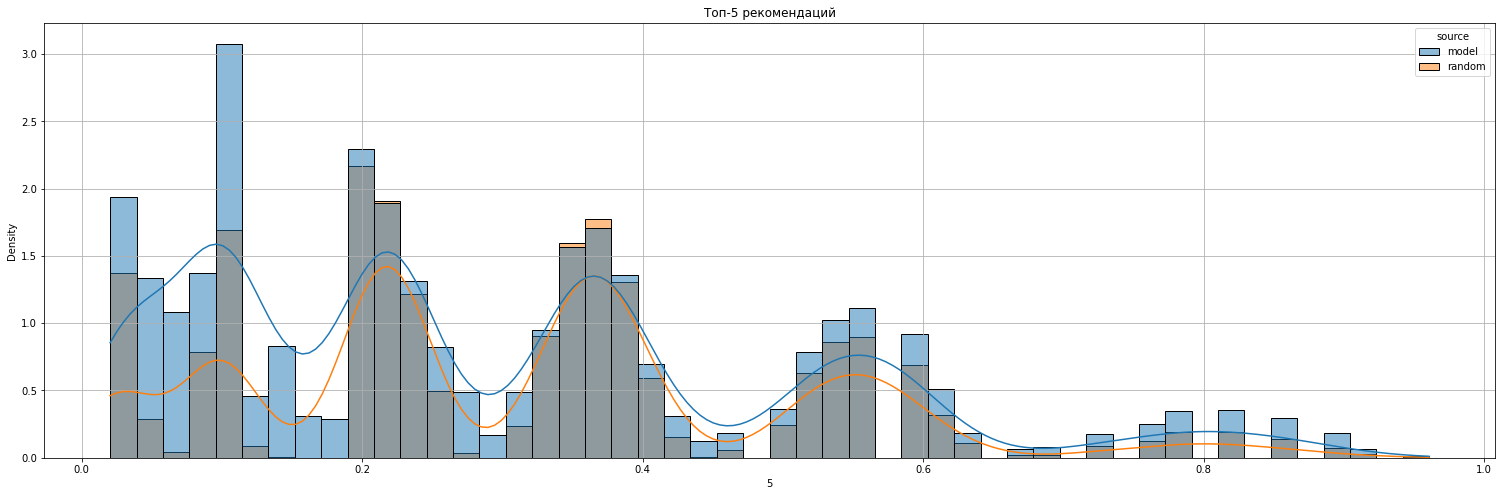

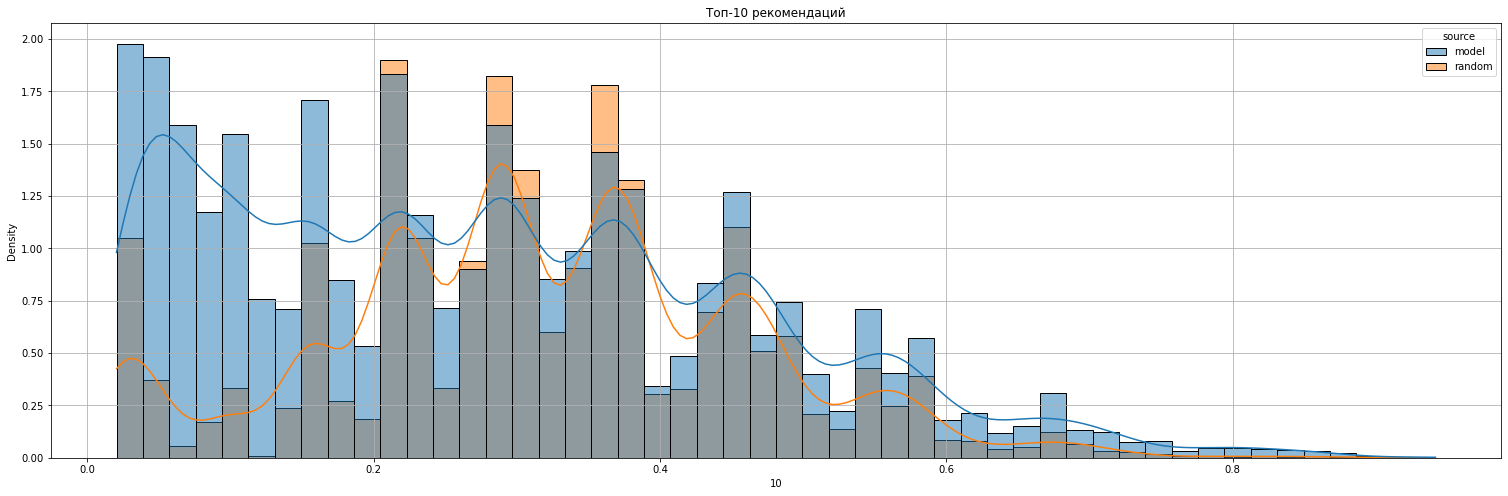

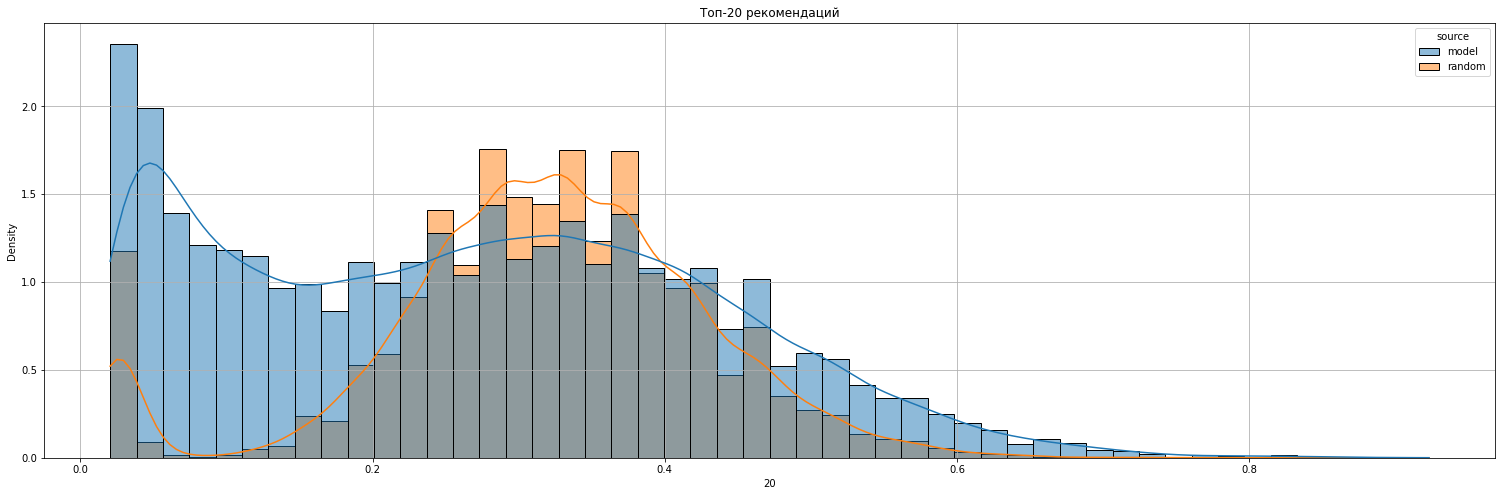

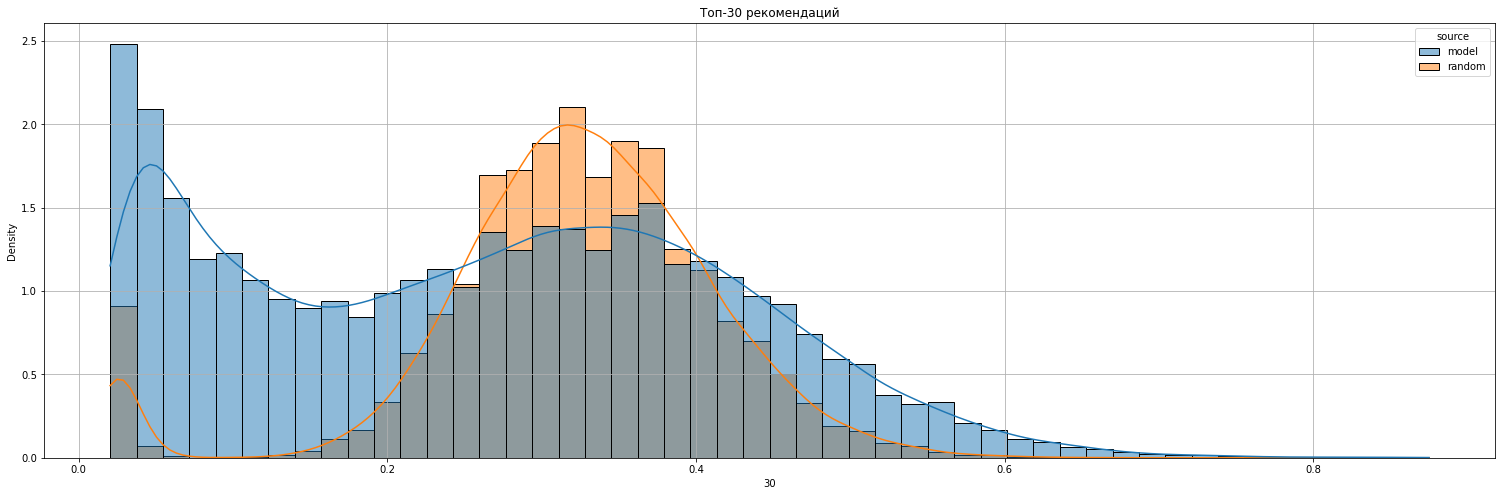

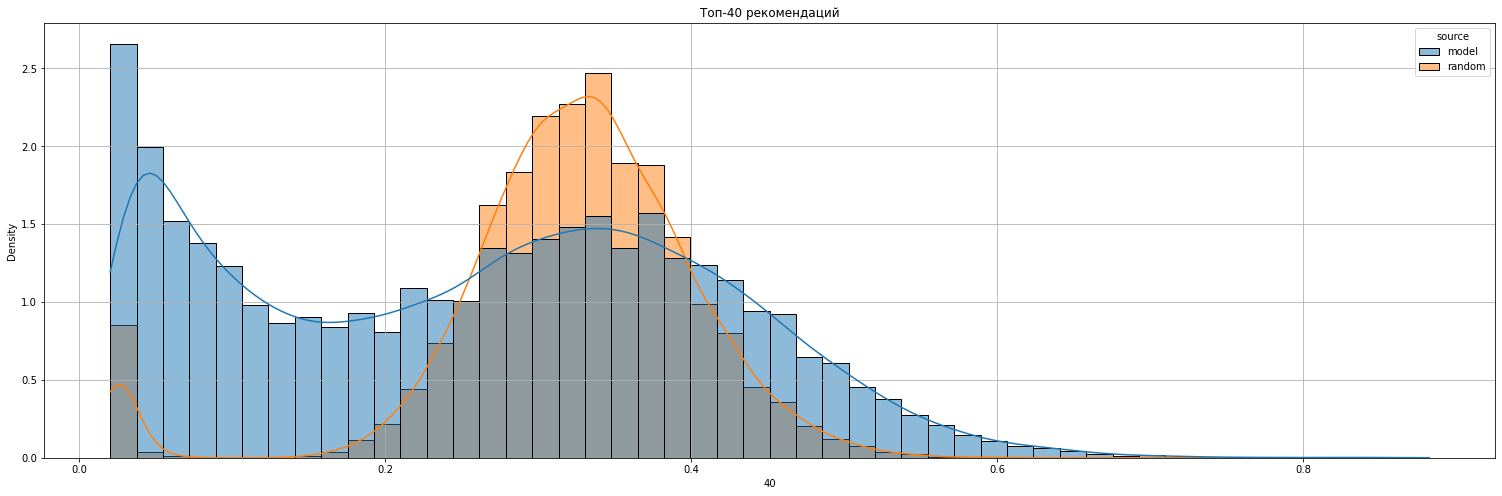

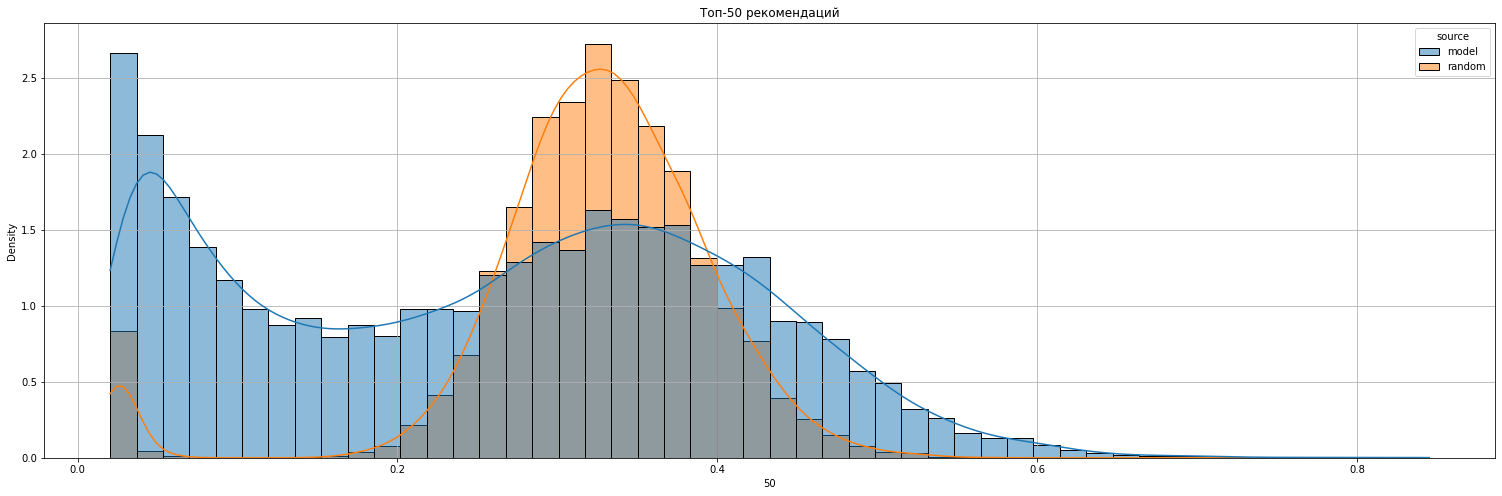

In [133]:
for top_n in ['1', '2', '3', '4', '5', '10', '20', '30', '40', '50']:
    sns.histplot(
        all_recs[all_recs[top_n] > min_border],
        x=top_n,
        hue='source',
        kde=True,
        common_bins=True,
        stat='density',
        bins=50
    ).set(title=f'Топ-{top_n} рекомендаций')
    plt.grid()
    plt.show()

Для начальных значений n для топ-n рекомендаций, количество в абсолютном большинстве бинов у модельных рекомендаций выше, чем у случайных рекомендаций. При бо'льших n, у случайных рекомендаций появляется "локальный максимум", наличие которого нельзя рассматривать как то, что модельные рекомендации проигрывают случайным. Не нужно забывать что мы "отрезали" хвост с "нулевой похожестью". Например для n=50:

Модель

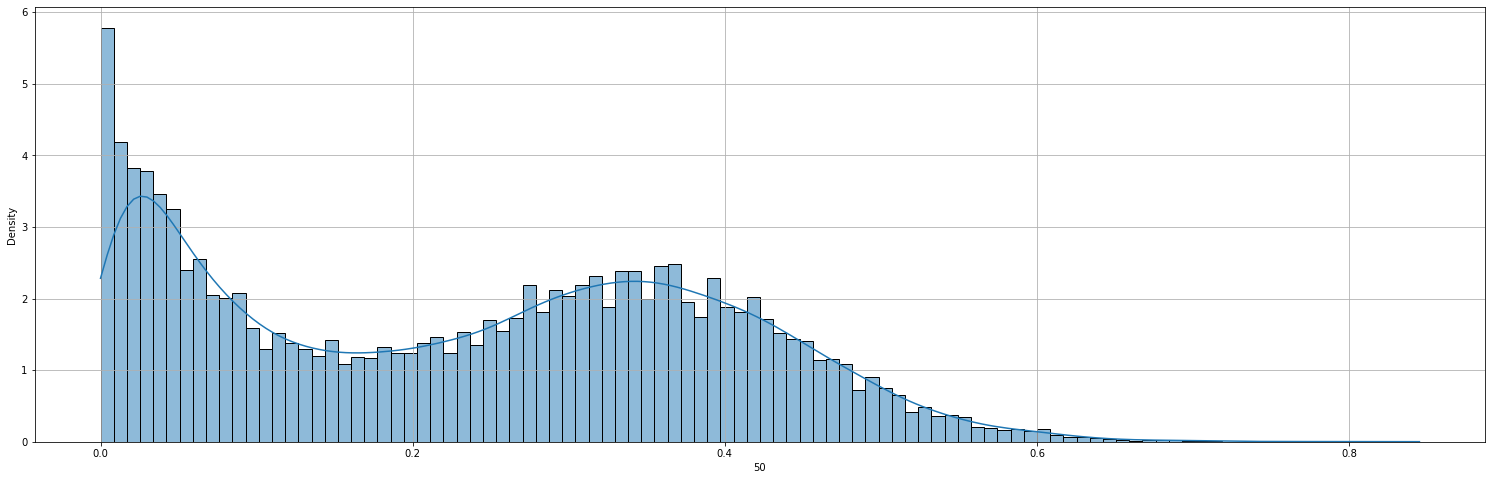

In [137]:
sns.histplot(model_recs['50'], kde=True, common_bins=True, stat='density', bins=100)
plt.grid()

Случайные рекомендации

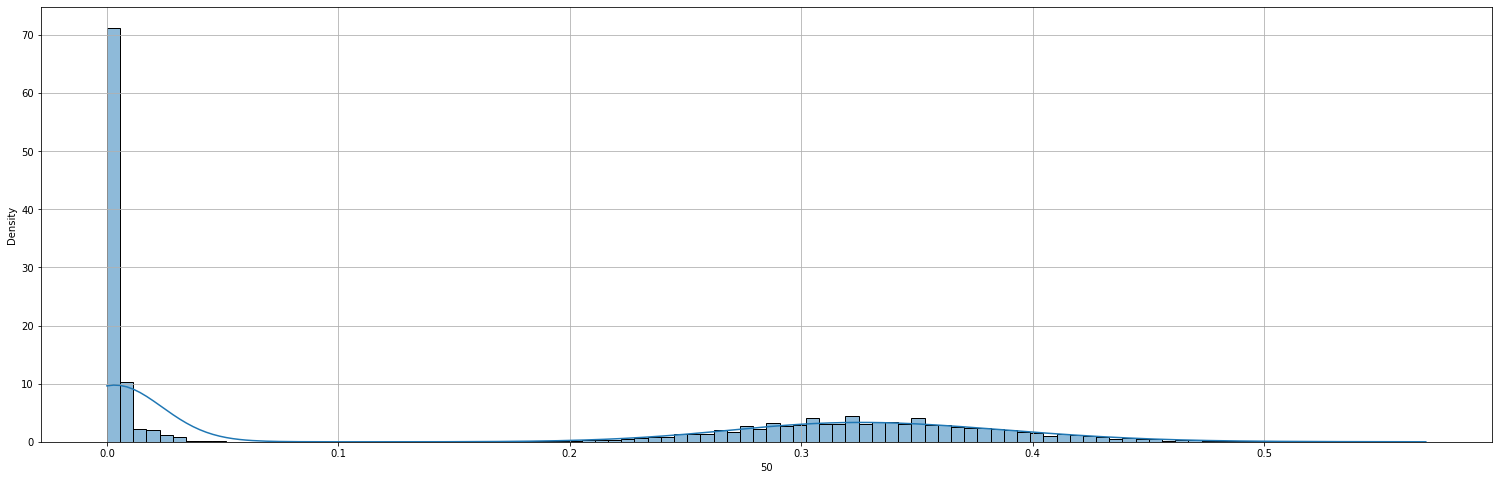

In [138]:
sns.histplot(random_recs['50'], kde=True, common_bins=True, stat='density', bins=100)
plt.grid()

Мало смысла в 50 рекомендацих, среди которых абсолютное большинство никак не относятся к статье-источнику (в случае случайных рекомендаций)

#### Итог

Основываясь на полученных значениях метрики, можно сделать вывод, что рассматриваемая модель рекомендации статей показывает лучшее качество чем бенчмарк (случайные статьи в качестве рекомендаций).